# Capstone Three: Preprocessing and Modeling [Step 3]

## By Morgan Snellgrove

Our dataset is already all numeric so we do not need to create dummy variables. However, we do need to scale the features becuase we have very different ranges across the predictor variables. 

Steps for preprocessing:

1) Create X-feature dataframe and y-the target dataframe.
2) Split X and y into training and testing sets.
3) Scale X_train and X_test. 


Steps for modeling:

1) Make dummy classifier that always predicts class 1
2) Try some un-tuned models: Decision Tree, Random Forest, and Gradient Boost
3) Tune hyperparamters using GridSearchCV
4) Build final models with best parameters from CV
5) Select winning model

## Import libraries and packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold

## Read in data

In [2]:
data = pd.read_csv('fetal_health.csv')
data.head().transpose()

,0,1,2,3,4
baseline value,120.0,132.000,133.000,134.000,132.000
accelerations,0.0,0.006,0.003,0.003,0.007
fetal_movement,0.0,0.000,0.000,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000


## Create X and y and split into training and testing

In [3]:
X = data.drop(columns = 'fetal_health')
y = data['fetal_health']

In [4]:
X.shape

(2126, 21)

In [5]:
y.shape

(2126,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

## Scale X_train and X_test

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_train_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.298275,-0.569903,-0.206681,0.221624,-0.635182,-0.050157,-0.273208,-0.564771,-0.495808,0.113372,...,-0.958810,1.035678,-0.380359,-0.360114,-0.472427,0.105212,0.293534,0.142906,-0.605471,-0.524627
1,-0.009726,-0.311534,-0.206681,0.907582,0.052177,-0.050157,-0.273208,-0.738107,-0.268542,-0.156593,...,-0.034518,-0.083993,-0.213045,-0.020657,-0.472427,-0.077742,0.035884,-0.066398,-0.470621,-0.524627
2,0.298275,-0.828272,-0.206681,1.593539,-0.635182,-0.050157,-0.273208,1.804144,-1.063973,0.923265,...,-0.702062,0.628525,-0.491902,-0.020657,-0.472427,0.044227,0.164709,0.073138,-0.639183,-0.524627
3,1.222276,-0.828272,-0.206681,-1.150292,-0.291502,-0.050157,-0.273208,0.764132,-0.950340,-0.264579,...,-0.625038,0.594595,-0.380359,-1.039027,1.030664,0.654072,0.744423,0.701050,-0.504334,1.111881
4,1.119609,0.721942,-0.082219,-0.464334,-0.635182,-0.050157,-0.273208,-0.738107,0.299623,-0.534543,...,0.864100,-0.762582,0.623529,-0.020657,1.030664,0.654072,0.937661,0.910354,-0.268346,1.111881


In [9]:
X_test_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-2.165728,3.822371,-0.206681,0.907582,-0.635182,-0.050157,-0.273208,-1.258112,0.072357,-0.534543,...,-0.907461,0.526737,-1.105389,-1.378484,-0.472427,-1.297431,-0.930307,-1.322222,-0.436909,-2.161135
1,0.914275,-0.828272,-0.206681,-0.121355,-0.635182,-0.050157,-0.273208,0.128570,-0.836707,1.085244,...,-1.369607,1.578549,-0.380359,-1.039027,-0.472427,0.776041,0.873249,0.840586,-0.639183,-0.524627
2,0.606275,1.497050,-0.185937,1.250561,1.426895,-0.050157,-0.273208,0.186348,0.072357,-0.534543,...,0.812751,-0.592935,0.790843,1.337170,-0.472427,1.507854,0.486773,0.631282,1.754402,1.111881
3,-1.036393,2.272157,-0.206681,-0.807313,-0.635182,-0.050157,-0.273208,-1.431447,0.981421,-0.534543,...,-0.470989,0.221372,-0.659217,-0.699571,-0.472427,-0.382664,-0.157354,-0.345470,-0.504334,-0.524627
4,-0.009726,-0.311534,-0.185937,1.593539,0.395857,-0.050157,-0.273208,0.533019,0.981421,-0.534543,...,0.504653,-0.762582,-0.157273,-0.699571,1.030664,0.105212,-0.930307,0.073138,0.001354,1.111881


## Visualizing the Scaled Training Data

/var/folders/mw/tgvznz1d6xbdcgxt0rkwdh540000gn/T/ipykernel_31709/1290916488.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train_scaled.hist(ax = ax)


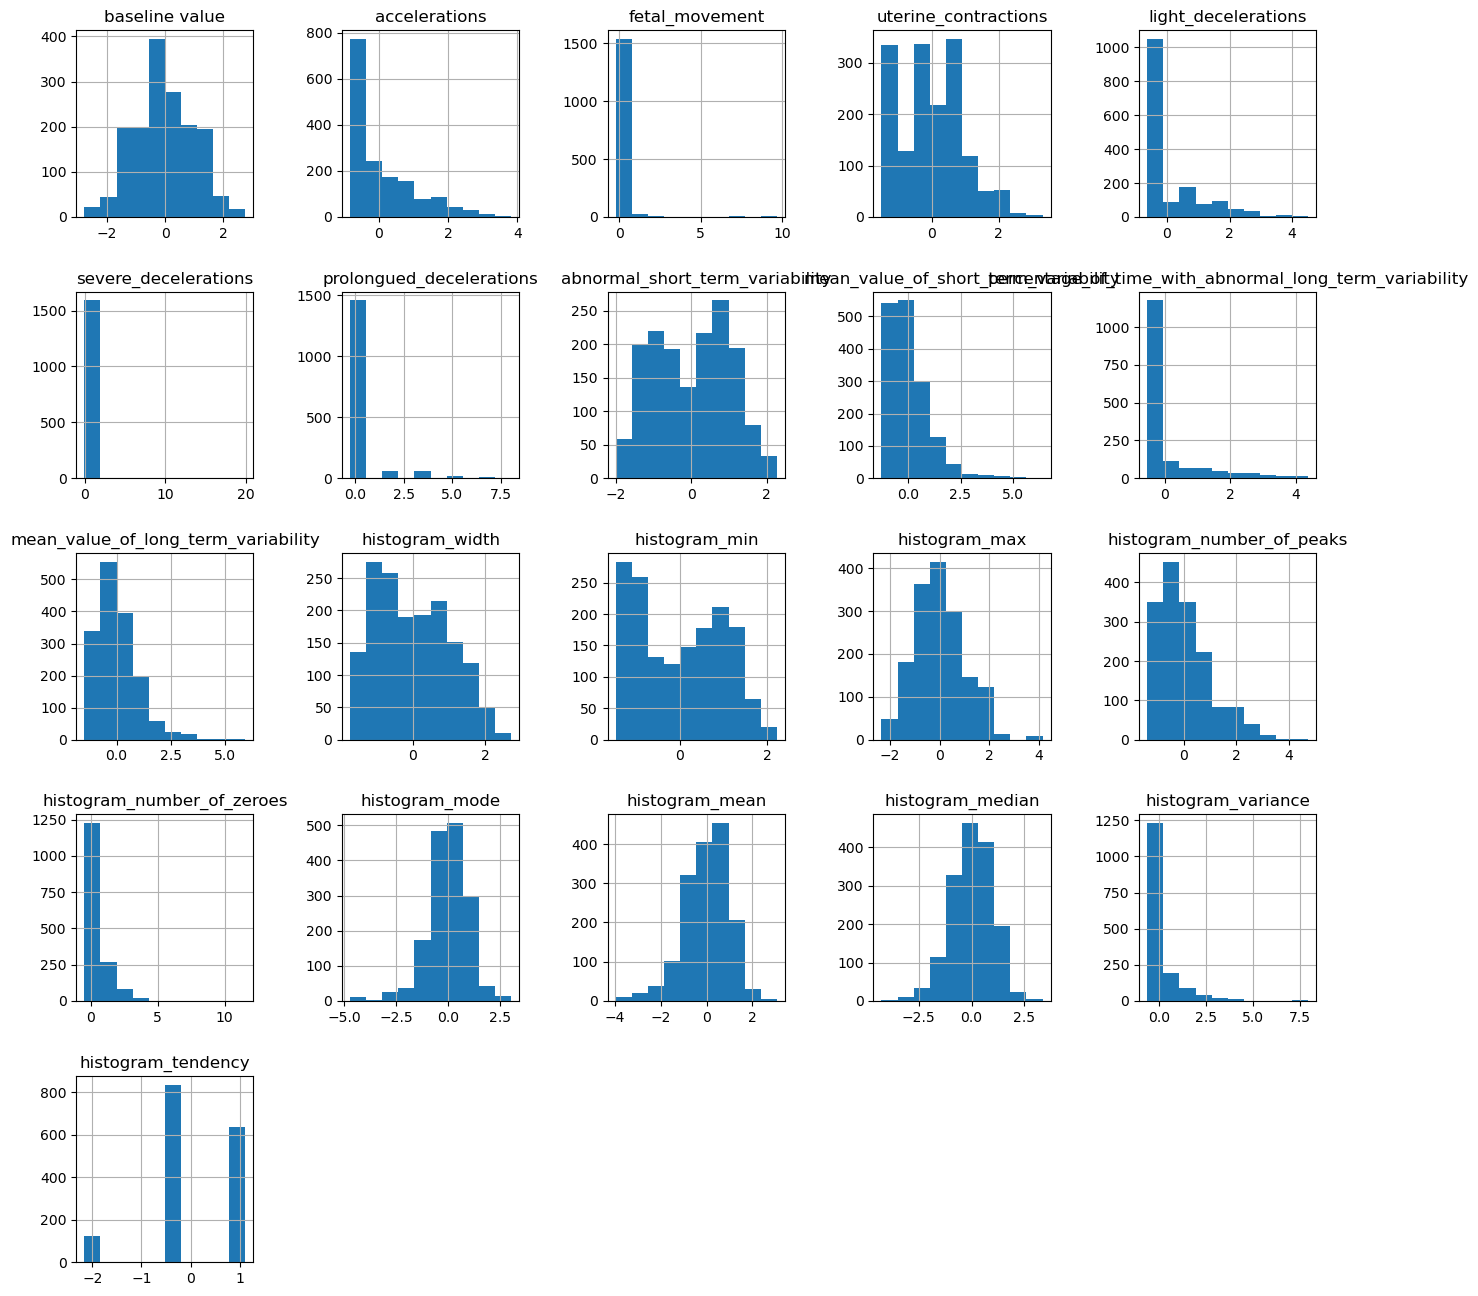

In [10]:
fig, ax = plt.subplots(figsize = (16,16))
X_train_scaled.hist(ax = ax)
plt.subplots_adjust(wspace = 0.5, hspace=0.4);

In [11]:
X_train_scaled.to_csv('fetal_health_X_train_scaled.csv')
X_test_scaled.to_csv('fetal_health_X_test_scaled.csv')
y_train.to_csv('fetal_health_y_train.csv')
y_test.to_csv('fetal_health_y_test.csv')

## Create Dummy Classifier for Baseline 

In [12]:
dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train_scaled, y_train)
preds = dummy_clf.predict(X_test_scaled)
score = dummy_clf.score(preds, y_test)

In [13]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.78      1.00      0.88       414
         2.0       0.00      0.00      0.00        74
         3.0       0.00      0.00      0.00        44

    accuracy                           0.78       532
   macro avg       0.26      0.33      0.29       532
weighted avg       0.61      0.78      0.68       532

[[414   0   0]
 [ 74   0   0]
 [ 44   0   0]]


/Users/morgansnellgrove/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morgansnellgrove/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morgansnellgrove/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [14]:
print(score)

0.7781954887218046


In [15]:
occ = y_train.value_counts()
print(occ/len(y_train))

1.0    0.778545
2.0    0.138645
3.0    0.082811
Name: fetal_health, dtype: float64


## Imbalance in Classes

I may need to use some resampling methods to address the class imbalance. I want to first try modeling with the data as is, and then I might come back and apply try a few resampling ideas on the training data. May try:

1) undersampling class 1 and oversampling classes 2 and 3
2) leaving class 1 alone and oversampling classes 2 and 3
3) learn about imbalanced learn library, RandomOverSampler, and SMOTE.


## Decision Tree Models

I decided to play around with some hyperperameters here. I do CV later. 

### Entropy Model, no max depth

In [16]:
entr_dt = DecisionTreeClassifier(criterion="entropy")
entr_dt.fit(X_train_scaled, y_train)
preds = entr_dt.predict(X_test_scaled)

In [17]:
tr_depth = entr_dt.get_depth()
print('Entropy Tree depth: ', tr_depth)

Entropy Tree depth:  14


In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       414
         2.0       0.71      0.74      0.72        74
         3.0       0.90      0.84      0.87        44

    accuracy                           0.91       532
   macro avg       0.85      0.84      0.85       532
weighted avg       0.91      0.91      0.91       532



In [19]:
print(confusion_matrix(y_test, preds))

[[393  19   2]
 [ 17  55   2]
 [  3   4  37]]


### Gini Impurity Model, no max depth

In [20]:
gini_dt = DecisionTreeClassifier(criterion = 'gini')
gini_dt.fit(X_train_scaled, y_train)
preds = gini_dt.predict(X_test_scaled)

In [21]:
tr_depth = gini_dt.get_depth()
print('Gini tree depth: ', tr_depth)

Gini tree depth:  14


In [22]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       414
         2.0       0.68      0.70      0.69        74
         3.0       0.90      0.84      0.87        44

    accuracy                           0.90       532
   macro avg       0.84      0.83      0.83       532
weighted avg       0.90      0.90      0.90       532



In [23]:
print(confusion_matrix(y_test, preds))

[[389  24   1]
 [ 19  52   3]
 [  6   1  37]]


## Observations

Looking at these two decision tree models with no max_depth, we see that they both got accuracy 0.94 and 0.91. Class 2 seems to be the hardest to predict for both models, but model 1 does a slightly better job. 

That's interesting because class 2 is more common than class 3, but the models are seeing class 3 easier. Perhaps the features for class 2 are more subtle, and class 3 stands out more?

The class imbalance doesn't seem to be that problematic. Both models performed much better than the dummy classifier. 

**Since this is a medical problem, false negatives on class 3 are very important as they could be fatal. That makes recall on class 3 the primary metric. Model 2 had better recall on class 3.**

## Let's try limiting the depths and see what happens. 

## Entropy Model, max_depth = 3

In [24]:
entr_dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
entr_dt.fit(X_train_scaled, y_train)
preds = entr_dt.predict(X_test_scaled)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.91      0.96      0.94       414
         2.0       0.68      0.61      0.64        74
         3.0       0.88      0.64      0.74        44

    accuracy                           0.88       532
   macro avg       0.82      0.73      0.77       532
weighted avg       0.88      0.88      0.88       532

[[397  15   2]
 [ 27  45   2]
 [ 10   6  28]]


## Gini Model, max_depth = 3

In [25]:
gini_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
gini_dt.fit(X_train_scaled, y_train)
preds = gini_dt.predict(X_test_scaled)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.92      0.97      0.94       414
         2.0       0.67      0.55      0.61        74
         3.0       0.91      0.73      0.81        44

    accuracy                           0.89       532
   macro avg       0.84      0.75      0.79       532
weighted avg       0.88      0.89      0.89       532

[[401  12   1]
 [ 31  41   2]
 [  4   8  32]]


## Random Forest Model

In [26]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)
preds = rf_clf.predict(X_test_scaled)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       414
         2.0       0.86      0.68      0.76        74
         3.0       0.87      0.89      0.88        44

    accuracy                           0.93       532
   macro avg       0.89      0.85      0.87       532
weighted avg       0.93      0.93      0.93       532

[[406   6   2]
 [ 20  50   4]
 [  3   2  39]]


## Gradient Boosting Classifier

In [27]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_scaled, y_train)
preds = gb_clf.predict(X_test_scaled)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       414
         2.0       0.86      0.68      0.76        74
         3.0       0.89      0.93      0.91        44

    accuracy                           0.93       532
   macro avg       0.90      0.86      0.88       532
weighted avg       0.93      0.93      0.93       532

[[405   7   2]
 [ 21  50   3]
 [  2   1  41]]


## Cross Validation on Decision Tree, Random Forest, and Gradient Boost

## Decision Tree 5-Fold CV

In [28]:
kf = KFold(n_splits = 5, shuffle = True)
param_grid = {'criterion':['entropy', 'gini'], 'max_depth': np.arange(3, 15, 1)}
dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(dt, param_grid, cv = kf)
dt_cv.fit(X_train_scaled, y_train)

print('Decision Tree best params: ', dt_cv.best_params_)
print('Decision Tree best score: ', dt_cv.best_score_)

Decision Tree best params:  {'criterion': 'gini', 'max_depth': 12}
Decision Tree best score:  0.930360205831904


## Random Forest 5-Fold CV

In [29]:
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, cv = kf)
rf_cv.fit(X_train_scaled, y_train)

print('Random Forest best params: ', rf_cv.best_params_)
print('Random Forest best score: ', rf_cv.best_score_)

Random Forest best params:  {'criterion': 'gini', 'max_depth': 14}
Random Forest best score:  0.9423000335166893


## Gradient Boost 5-Fold CV

In [30]:
param_grid = {'criterion': ['friedman_mse', 'squared_error'], 'learning_rate': [0.1, 0.15, 0.2, 0.25]}
gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, param_grid, cv = kf)
gb_cv.fit(X_train_scaled, y_train)

print('Gradient Boost best params: ', gb_cv.best_params_)
print('Gradient Boost best score: ', gb_cv.best_score_)

Gradient Boost best params:  {'criterion': 'friedman_mse', 'learning_rate': 0.15}
Gradient Boost best score:  0.9510695767039292


## Model Selection

Looks like Gradient Boost or Random Forest is the way to go. Now I want to train each one with the best parameters and look at the classification report and confusion matrix again. 

## Final Random Forest Model

In [31]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 13)
rf.fit(X_train_scaled, y_train)
preds = rf.predict(X_test_scaled)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       414
         2.0       0.83      0.68      0.75        74
         3.0       0.90      0.86      0.88        44

    accuracy                           0.93       532
   macro avg       0.89      0.84      0.86       532
weighted avg       0.93      0.93      0.93       532

[[407   6   1]
 [ 21  50   3]
 [  2   4  38]]


## Final Gradient Boost Model

In [32]:
gb = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.25)
gb.fit(X_train_scaled, y_train)
preds = gb.predict(X_test_scaled)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       414
         2.0       0.87      0.70      0.78        74
         3.0       0.89      0.93      0.91        44

    accuracy                           0.94       532
   macro avg       0.90      0.87      0.88       532
weighted avg       0.93      0.94      0.93       532

[[405   7   2]
 [ 19  52   3]
 [  2   1  41]]


## Conclusion = Final Gradient Boost is the winner

Looking at the recall scores, we see the best scores we have gotten yet. From the confusion maxtrix we can see that we have some false negatives and false positives for class 3. We also see that class 2 continues to be the most difficult to predict, as 8 of those were incorrectly classified as class 1. The 8 and the 2 in the first col of the confusion matrix are the main areas of concern. Overall, 10 cases that needed attention were classified as normal. 

I wonder if combining classes 2 and 3 into one class with pos label and letting class 1 be the neg label would improve the model. 

## Let's reorganize the target into 2 classes. We'll let the positive class be classes 2,  3 and the negative class be class 1. 

First I'm going to make a copy of my orginal dataframe, data. 

Then I'll create a new column called "binary_target". 


In [33]:
binary_df = data.copy(deep = True)
binary_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [34]:
binary_df['binary_target'] = [1 if x in [2.0, 3.0] else 0 for x in binary_df['fetal_health']]

In [35]:
binary_df[['fetal_health', 'binary_target']].head(10)

,fetal_health,binary_target
0,2.0,1
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0
5,3.0,1
6,3.0,1
7,3.0,1
8,3.0,1
9,3.0,1


In [36]:
binary_df['binary_target'].value_counts()

0    1655
1     471
Name: binary_target, dtype: int64

## Create new X and y

In [37]:
X = binary_df.drop(columns = ['fetal_health', 'binary_target'])
y = binary_df['binary_target']

In [38]:
X.shape

(2126, 21)

In [39]:
y.shape

(2126,)

## Train test split for new X and y

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

## Scale X_train and X_test

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_train_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.282775,-0.567532,-0.20626,0.218961,-0.629701,-0.056095,-0.268545,-0.558548,-0.486077,0.102294,...,-0.959135,1.030214,-0.387419,-0.360748,-0.469258,0.088649,0.276821,0.125907,-0.598872,-0.541369
1,-0.023853,-0.309283,-0.20626,0.906691,0.051265,-0.056095,-0.268545,-0.731752,-0.261723,-0.163704,...,-0.035491,-0.086764,-0.220108,-0.023683,-0.469258,-0.094866,0.017451,-0.083442,-0.464864,-0.541369
2,0.282775,-0.825781,-0.20626,1.594421,-0.629701,-0.056095,-0.268545,1.808573,-1.046961,0.900288,...,-0.702567,0.624040,-0.498960,-0.023683,-0.469258,0.027477,0.147136,0.056124,-0.632373,-0.541369
3,1.304869,-0.825781,-0.14407,-1.500365,-0.629701,-0.056095,-0.268545,1.981777,-1.271315,3.028272,...,-1.472271,1.470236,-0.777812,-1.034878,-0.469258,0.516853,0.601034,0.544603,-0.598872,-0.541369
4,1.100450,0.723712,-0.08188,-0.468770,-0.629701,-0.056095,-0.268545,-0.731752,0.299162,-0.536101,...,0.862496,-0.763721,0.616448,-0.023683,0.969197,0.639197,0.925246,0.893517,-0.263853,1.105466


## Now, let's create a new dummy classifier

In [43]:
dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train_scaled, y_train)
preds = dummy_clf.predict(X_test_scaled)
score = dummy_clf.score(preds, y_test)

In [44]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       414
           1       0.00      0.00      0.00       118

    accuracy                           0.78       532
   macro avg       0.39      0.50      0.44       532
weighted avg       0.61      0.78      0.68       532

[[414   0]
 [118   0]]


/Users/morgansnellgrove/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morgansnellgrove/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/morgansnellgrove/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

## Decision Tree CV using binary target

In [45]:
kf = KFold(n_splits = 5, shuffle = True)
param_grid = {'criterion':['entropy', 'gini'], 'max_depth': np.arange(3, 15, 1)}
dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(dt, param_grid, cv = kf)
dt_cv.fit(X_train_scaled, y_train)

print('Decision Tree best params: ', dt_cv.best_params_)
print('Decision Tree best score: ', dt_cv.best_score_)

Decision Tree best params:  {'criterion': 'entropy', 'max_depth': 10}
Decision Tree best score:  0.9341377338774866


## Random Forest CV using binary target

In [46]:
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, cv = kf)
rf_cv.fit(X_train_scaled, y_train)

print('Random Forest best params: ', rf_cv.best_params_)
print('Random Forest best score: ', rf_cv.best_score_)

Random Forest best params:  {'criterion': 'entropy', 'max_depth': 11}
Random Forest best score:  0.9466670609806588


## Gradient Boost CV using binary target

In [47]:
param_grid = {'criterion': ['friedman_mse', 'squared_error'], 'learning_rate': [0.1, 0.15, 0.2, 0.25]}
gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, param_grid, cv = kf)
gb_cv.fit(X_train_scaled, y_train)

print('Gradient Boost best params: ', gb_cv.best_params_)
print('Gradient Boost best score: ', gb_cv.best_score_)

Gradient Boost best params:  {'criterion': 'friedman_mse', 'learning_rate': 0.25}
Gradient Boost best score:  0.9567122099327694


## Logistic Regression CV using binary target

In [48]:
param_grid = {'C': [0.1, 1.0, 10, 100]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=kf)
logreg_cv.fit(X_train_scaled, y_train)

print('Logistic Regression best params: ', logreg_cv.best_params_)
print('Logistic Regression best score: ', logreg_cv.best_score_)

Logistic Regression best params:  {'C': 100}
Logistic Regression best score:  0.9084126890242701


## Right now it still looks like Gradient Boost is working the best. Let's create a GB model using the best params and the binary target. 

In [49]:
gb = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.25)
gb.fit(X_train_scaled, y_train)
preds = gb.predict(X_test_scaled)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       414
           1       0.92      0.88      0.90       118

    accuracy                           0.96       532
   macro avg       0.94      0.93      0.94       532
weighted avg       0.96      0.96      0.96       532

[[405   9]
 [ 14 104]]


## Looking at the metrics...

+ We see that we got 0.92 recall for class 1. Our best GB model for the multiclass target had class 2 recall of 0.84 and class 3 recall of 0.98. 

+ From the confusion matrix, we see that 9 class 1 examples were misclassified as 0. This is an improvement from the 13 combined misclassifications we got on the other GB model. 

+ Now I wonder how many of the 9 were class 2 or class 3... I don't want to miss more class 3 than before. 